In [108]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten, Reshape, MaxPooling1D
import matplotlib.pyplot as plt

In [51]:
inputs = []
targets = []

In [52]:
for i in range(52):
    with open('dataset/data' + str(i) + '.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['dfts']
        targets = targets + data['peakFreqs']

In [53]:
inputs = np.array(inputs)
targets = np.array(targets)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.2)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
test = X_train[0]

In [55]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(232, 1)

232


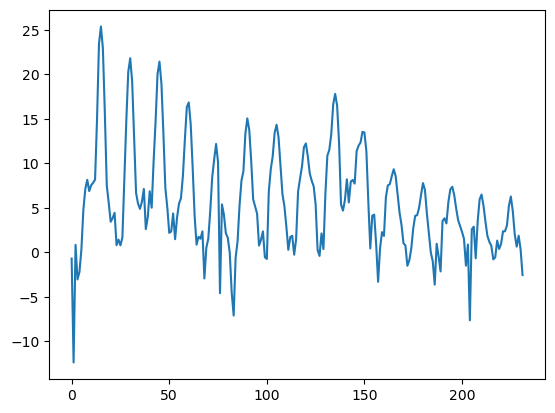

In [56]:
plt.plot(X_train[0])
print(len(X_train[0]))

In [110]:
model = Sequential()

model.add(LSTM(units=230, activation='tanh', return_sequences=True, input_shape=input_shape))

model.add(Conv1D(filters=232, kernel_size=15, activation='relu' ))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=232, kernel_size=9, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=232, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=232, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=232, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(232, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='linear'))

In [111]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             loss='mean_squared_error',
             metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 232, 230)          213440    
                                                                 
 conv1d_120 (Conv1D)         (None, 218, 232)          800632    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 109, 232)         0         
 1D)                                                             
                                                                 
 conv1d_121 (Conv1D)         (None, 101, 232)          484648    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 50, 232)          0         
 1D)                                                             
                                                                 
 conv1d_122 (Conv1D)         (None, 44, 232)         

In [113]:
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          epochs=50,
          batch_size=32)

Epoch 1/50
6/6 [==============================] - 5s 618ms/step - loss: 866879.5000 - accuracy: 0.5397 - val_loss: 881387.4375 - val_accuracy: 1.0000
Epoch 2/50
6/6 [==============================] - 3s 554ms/step - loss: 866666.6875 - accuracy: 0.5556 - val_loss: 880705.8125 - val_accuracy: 1.0000
Epoch 3/50
6/6 [==============================] - 3s 563ms/step - loss: 865374.5000 - accuracy: 0.5503 - val_loss: 877154.5625 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 3s 554ms/step - loss: 859664.2500 - accuracy: 0.4815 - val_loss: 860653.0625 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 3s 552ms/step - loss: 837629.3125 - accuracy: 0.5714 - val_loss: 800616.0000 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 3s 549ms/step - loss: 812077.3750 - accuracy: 0.6032 - val_loss: 736649.5000 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 3s 548ms/step - loss: 785336.1250 - accuracy: 0.50

In [114]:
prediction = model.predict(X_train)

6/6 [==============================] - 2s 107ms/step


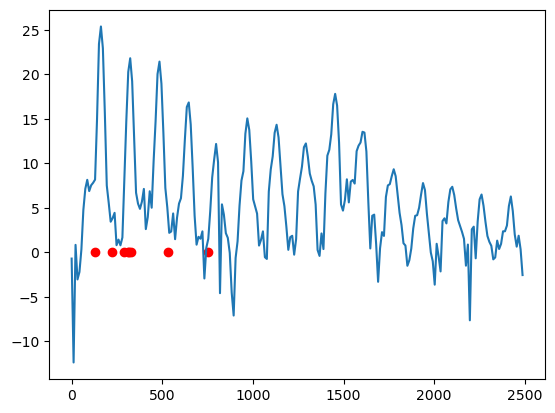

In [115]:
plt.plot(np.arange(len(X_train[0])) * 44100 / 4096, X_train[0])
plt.scatter(prediction[0], np.zeros(len(prediction[0])), c='r')

In [116]:
prediction[0]

array([126.352715, 222.06339 , 328.4403  , 314.99753 , 754.8238  ,
       290.5675  , 312.3936  , 533.8751  ], dtype=float32)

In [117]:
y_train[0]

array([ 175.78125,  351.5625 ,  527.34375,  703.125  ,  867.1875 ,
       1054.6875 , 1230.46875, 1570.3125 ])